## Step 1. Identify datasets

### TODO: 
- Explain why the selected datasets are particularly interesting to you. **Max points: 1**.
- If you cross reference multiple datasets, please explain your reasoning. **Max points: 2**.

**Description**

Attention: this data is not updated after 2022 anymore. This data collection contains information concerning all accidents by snow avalanches causing at least one fatality in Switzerland. The data set commences on 01/10/1995. After the completion of a hydrological year, the new data is added. The following information is provided:

- **avalanche.id** = avalanche identifier  
- **date** = date of the accident (YYYY-MM-DD)
- **date.quality** = accuracy of the date in range of days before and after
- **hydrological.year** = 12-month period from 1 October to 30 September
- **canton** = Cantons of Switzerland (Member states of the Swiss Confederation)
- **local.name** = name of the locality  
- **start.zone.coordinates.x/y** = start zone of the avalanche (Swiss coordinate system, approximately in the middle of start zone)  
- **coordinates.quality** = accuracy of the coordinates in meters  
- **start.zone.elevation** = elevation (in meters above sea level, approximately in the middle of start zone)  
- **start.zone.slope.aspect** = slope aspect (main orientation of start zone)  
- **start.zone.inclination** = slope inclination (in degree, steepest point within start zone)  
- **forecasted.dangerlevel** = forecasted avalanche danger level (1-5)  
- **number.dead** = number of dead persons  
- **number.caught** = number of caught persons  
- **number.fully.buried** = number of fully buried persons  
- **activity** = activity/location of the accident party at the time of the incident  


## Step 2. Visualize data

TODO:
- Analyze your selected datasets by creating visualizations and computing descriptive
 statistics. This step provides an initial understanding of the data and its characteristics.
 **Max points: 5**.
- Clearly explain the reasons for choosing these analyses. **Max points: 3**.
- Explain what you observe from data. **Max points: 3**.

Visualization ideas:
- fatalities vs hydrological years (dead, caught, buried, combined)
- fatalities vs months (dead, caught, buried, combined)
- fatalities vs activities (dead, caught, buried, combined)
- histogram of cantons (popularity / fatality)
- Other interesting data:
  - Danger level, elevation, slope aspect, inclination, coordinates, local name

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
avalanches = pd.read_csv('datasets/AvalanchesSwitzerland/avalanche_accidents_switzerland_since_1995.csv', encoding='Windows-1252')
ACCIDENT_TYPES = ['number.dead', 'number.caught', 'number.fully.buried']  # to improve code readability by getting rid of the long list
# length: 455  width: 17
avalanches.head(5)

,avalanche.id,date,date.quality,hydrological.year,canton,local.name,start.zone.coordinates.x,start.zone.coordinates.y,coordinates.quality,start.zone.elevation,start.zone.slope.aspect,start.zone.inclination,forecasted.dangerlevel,number.dead,number.caught,number.fully.buried,activity
0,13007,1995-12-25,0,1995/96,VS,Chetseron / Vallon de l`Ertentse,602380,131230,25,2060,NW,NaN,NaN,2,2,0,offpiste
1,13014,1995-12-28,0,1995/96,VS,Verbier / Les Ruinettes,586070,104160,25,2340,NNE,39.0,NaN,1,1,1,offpiste
2,13028,1996-01-14,0,1995/96,GR,Chilchalphorn,731720,155110,25,2960,E,35.0,NaN,1,4,2,tour
3,13038,1996-02-14,0,1995/96,VD,La Lécherette,575300,141010,25,1580,NNW,42.0,NaN,1,2,1,offpiste
4,13040,1996-02-15,0,1995/96,OW,Pilatus / Matthorn / Ruessiflue,661640,202180,25,1860,NW,40.0,NaN,1,4,3,tour


### Descriptive statistics

In [10]:
avalanches[['coordinates.quality', 'start.zone.elevation', 'start.zone.inclination', 'forecasted.dangerlevel', 'number.dead', 'number.caught', 'number.fully.buried']].describe()

,coordinates.quality,start.zone.elevation,start.zone.inclination,forecasted.dangerlevel,number.dead,number.caught,number.fully.buried
count,455.000000,455.000000,330.000000,387.000000,455.000000,455.000000,455.000000
mean,47.527473,2514.936264,40.587879,2.728682,1.259341,2.178022,1.334066
std,84.564099,536.316707,4.874084,0.620278,0.781670,1.931982,1.219538
min,25.000000,725.000000,23.000000,1.000000,1.000000,1.000000,0.000000
25%,25.000000,2150.000000,37.000000,2.000000,1.000000,1.000000,1.000000
50%,25.000000,2470.000000,40.000000,3.000000,1.000000,2.000000,1.000000
75%,25.000000,2820.000000,43.000000,3.000000,1.000000,3.000000,1.000000
max,1000.000000,4220.000000,55.000000,5.000000,9.000000,17.000000,12.000000


### The most popular places to go skiing from
Histogram of cantons

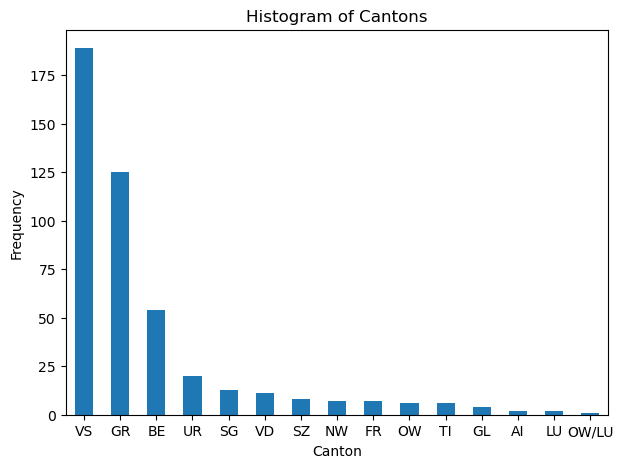

In [12]:
cantons_hist = avalanches['canton'].value_counts()
cantons_hist.plot(kind='bar', figsize=(7, 5))
plt.xlabel('Canton')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title('Histogram of Cantons')
plt.show()

### Number of dead, cought, fully buried per hydrological year

C:\Users\mikol\AppData\Local\Temp\ipykernel_1700\640033186.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


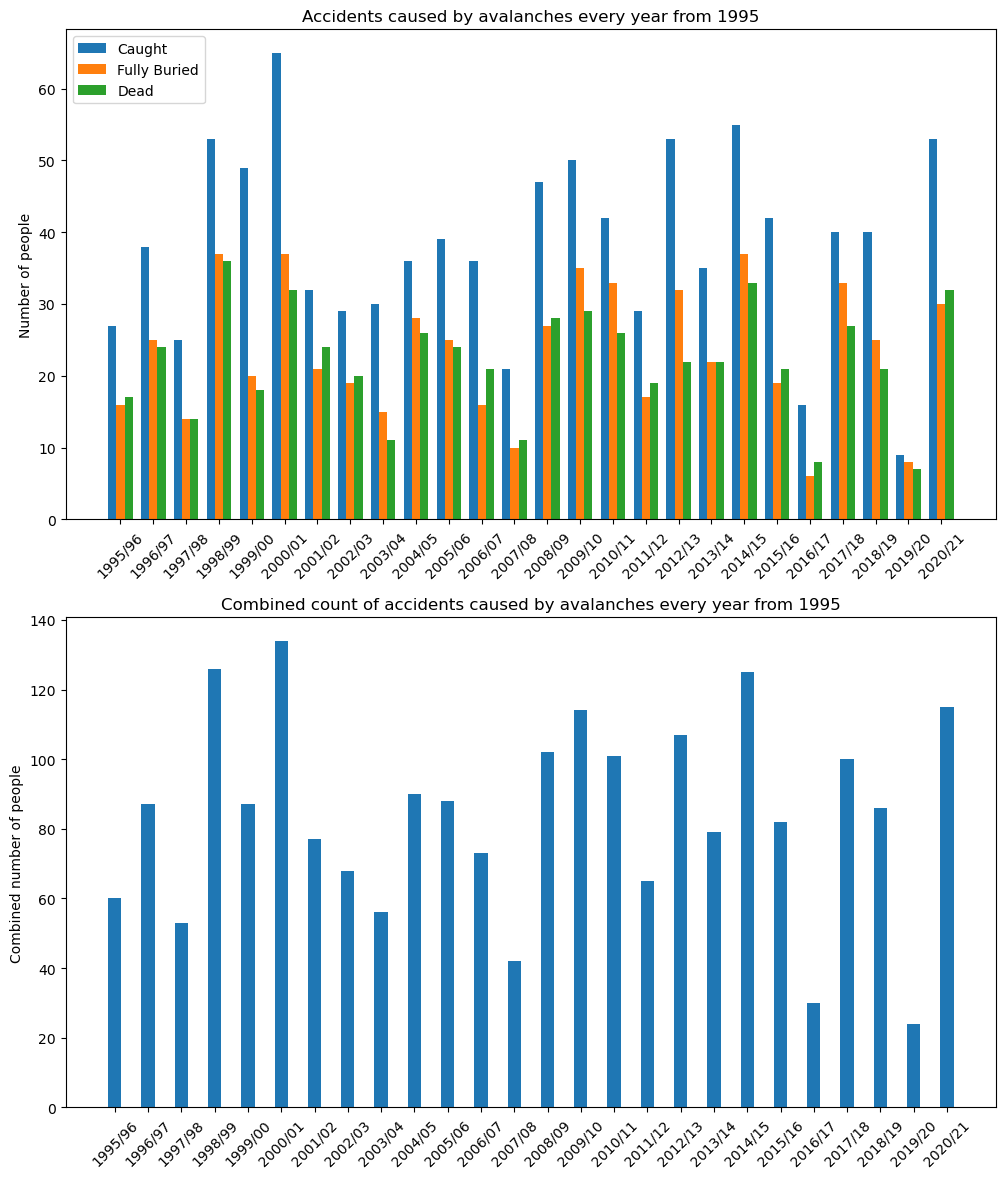

In [14]:
# Prepare data
accidents_by_year = avalanches.groupby(['hydrological.year'], as_index=False)[ACCIDENT_TYPES].sum()
accidents_by_year['number.combined']= accidents_by_year[ACCIDENT_TYPES].sum(axis=1)
x = accidents_by_year['hydrological.year']
X_axis = np.arange(len(accidents_by_year))

# Plot data
fig1, ax1 = plt.subplots(2,1, figsize=(12,14))
# years vs dead, caught, fully buried
ax1[0].bar(X_axis - 0.25, accidents_by_year['number.caught'], 0.25, label='Caught')
ax1[0].bar(X_axis, accidents_by_year['number.fully.buried'], 0.25, label='Fully Buried')
ax1[0].bar(X_axis + 0.25, accidents_by_year['number.dead'], 0.25, label='Dead')
ax1[0].set_xticks(range(len(x)), x, rotation=45)
ax1[0].set_ylabel('Number of people')
ax1[0].set_title('Accidents caused by avalanches every year from 1995')
ax1[0].legend(loc='upper left')

ax1[1].bar(X_axis, accidents_by_year['number.combined'], 0.4)
ax1[1].set_xticks(range(len(x)), x, rotation=45)
ax1[1].set_title('Combined count of accidents caused by avalanches every year from 1995')
ax1[1].set_ylabel('Combined number of people')


fig1.show()

### Number of accidents per month

C:\Users\mikol\AppData\Local\Temp\ipykernel_1700\1318178286.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


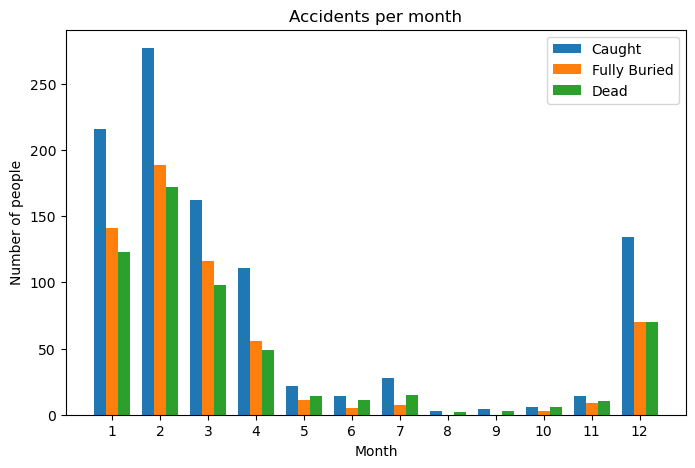

In [16]:
from datetime import datetime
avalanches['date'] = pd.to_datetime(avalanches['date'], format="%Y-%m-%d")
avalanches['month'] = avalanches['date'].dt.month
accidents_by_month = avalanches.groupby(by='month', as_index=False)[ACCIDENT_TYPES].sum()

x = accidents_by_month['month']
X_axis = np.arange(len(accidents_by_month))

fig2, ax2 = plt.subplots(figsize=(8,5))

ax2.bar(X_axis - 0.25, accidents_by_month['number.caught'], 0.25, label='Caught')
ax2.bar(X_axis, accidents_by_month['number.fully.buried'], 0.25, label='Fully Buried')
ax2.bar(X_axis + 0.25, accidents_by_month['number.dead'], 0.25, label='Dead')
ax2.set_xticks(range(len(x)), x)
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of people')
ax2.set_title('Accidents per month')
ax2.legend(loc='upper right')

fig2.show()

### Number of accidents per activity
**Provide explanation to the difference between off-piste and touring**

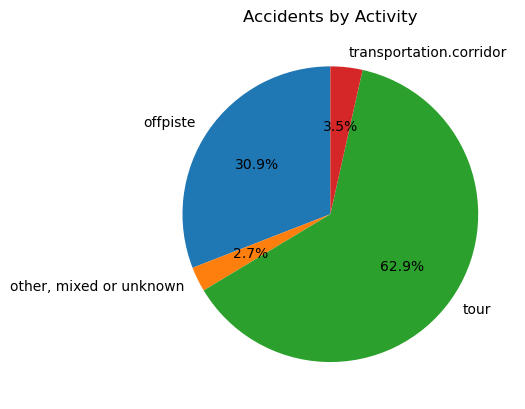

In [18]:
accidents_by_activity = avalanches.groupby(['activity'], as_index=False)[ACCIDENT_TYPES].sum()
accidents_by_activity['number.combined'] = accidents_by_activity[ACCIDENT_TYPES].sum(1)

# Combine "building" into "other, mixed or unknown"
# Step 1: Identify rows
building_row = accidents_by_activity[accidents_by_activity['activity'] == 'building']
other_unknown_row = accidents_by_activity[accidents_by_activity['activity'] == 'other, mixed or unknown']

# Step 2: Sum the relevant columns
combined_row = other_unknown_row.copy()
for col in ['number.dead', 'number.caught', 'number.fully.buried', 'number.combined']:
    combined_row[col] = building_row[col].values[0] + other_unknown_row[col].values[0]

# Step 3: Update the "other, mixed or unknown" row
accidents_by_activity.loc[
    accidents_by_activity['activity'] == 'other, mixed or unknown', 
    ['number.dead', 'number.caught', 'number.fully.buried', 'number.combined']
] = combined_row[['number.dead', 'number.caught', 'number.fully.buried', 'number.combined']].values

# Step 4: Drop the "building" row
accidents_by_activity = accidents_by_activity[accidents_by_activity['activity'] != 'building'].reset_index(drop=True)

fig2, ax2 = plt.subplots()
ax2.pie(
    accidents_by_activity['number.combined'].astype(int),
    labels = accidents_by_activity['activity'], 
    autopct='%1.1f%%',  # Optionally, add percentage labels
    startangle=90       # Start angle for better visual clarity
)
plt.title('Accidents by Activity')  # Add a title for context
plt.show()

## Step 3. Formulate hypotheses:
- Based on your observations from Step 2, propose **three hypotheses** driven by your
interests, domain knowledge, and insights from the data. Make sure that the hypotheses
are logically connected and contribute to a larger, cohesive question. **Max points: 5**.
- For example, "The average income correlates with education level across different
regions". Avoid common-sense hypotheses that lack novelty, e.g., "More rain increases
umbrella sales".

### Correlation between start zone elevation and the number of accidents

### Correlation (not correlation actually) between the slope aspect and the number of accidents

## Step 4. Validate or invalidate your hypotheses with statistical analysis:


Formulate your hypotheses as statistical hypotheses. 
Perform statistical analyses to test these hypotheses. 
Illustrate the statistical significance and provide a clear, logical explanation of your findings. **Max points: 8.**

### 1. Correlation between start zone elevation and the number of accidents

In [50]:
avalanches.head()

,avalanche.id,date,date.quality,hydrological.year,canton,local.name,start.zone.coordinates.x,start.zone.coordinates.y,coordinates.quality,start.zone.elevation,start.zone.slope.aspect,start.zone.inclination,forecasted.dangerlevel,number.dead,number.caught,number.fully.buried,activity,month
0,13007,1995-12-25,0,1995/96,VS,Chetseron / Vallon de l`Ertentse,602380,131230,25,2060,NW,NaN,NaN,2,2,0,offpiste,12
1,13014,1995-12-28,0,1995/96,VS,Verbier / Les Ruinettes,586070,104160,25,2340,NNE,39.0,NaN,1,1,1,offpiste,12
2,13028,1996-01-14,0,1995/96,GR,Chilchalphorn,731720,155110,25,2960,E,35.0,NaN,1,4,2,tour,1
3,13038,1996-02-14,0,1995/96,VD,La Lécherette,575300,141010,25,1580,NNW,42.0,NaN,1,2,1,offpiste,2
4,13040,1996-02-15,0,1995/96,OW,Pilatus / Matthorn / Ruessiflue,661640,202180,25,1860,NW,40.0,NaN,1,4,3,tour,2


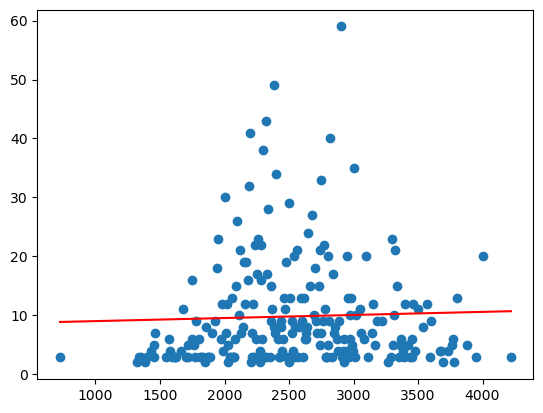

In [25]:
from sklearn import linear_model
# TODO: move data into clusters that increase in height every 250m starting from 500m

elevation_data = avalanches[['start.zone.elevation'] + ACCIDENT_TYPES].groupby(['start.zone.elevation'], as_index=False).sum()
elevation_data['number.combined'] = elevation_data[ACCIDENT_TYPES].sum(axis=1)

regr = linear_model.LinearRegression()
regr.fit(np.array(elevation_data['start.zone.elevation']).reshape(-1,1), np.array(elevation_data['number.combined']).reshape(-1,1))
y_reg = regr.predict(np.array(elevation_data['start.zone.elevation']).reshape(-1,1))

plt.scatter(elevation_data['start.zone.elevation'], elevation_data['number.combined'])
plt.plot(elevation_data['start.zone.elevation'], y_reg, 'r')


### 2. Correlation between the slope aspect and the number of accidents

TODO: Assign the slope aspect to the start zone elevation and compare accident results
TODO: Get rid of outliers!

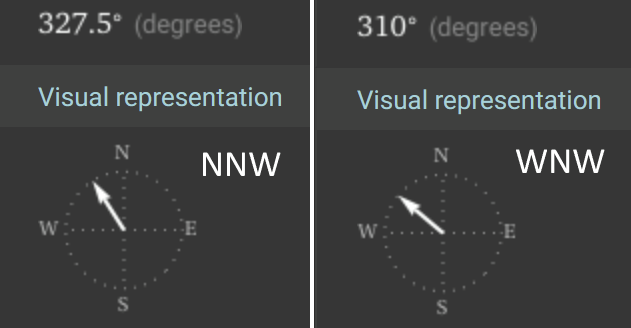

In [28]:
avalanches.head(5)

,avalanche.id,date,date.quality,hydrological.year,canton,local.name,start.zone.coordinates.x,start.zone.coordinates.y,coordinates.quality,start.zone.elevation,start.zone.slope.aspect,start.zone.inclination,forecasted.dangerlevel,number.dead,number.caught,number.fully.buried,activity,month
0,13007,1995-12-25,0,1995/96,VS,Chetseron / Vallon de l`Ertentse,602380,131230,25,2060,NW,NaN,NaN,2,2,0,offpiste,12
1,13014,1995-12-28,0,1995/96,VS,Verbier / Les Ruinettes,586070,104160,25,2340,NNE,39.0,NaN,1,1,1,offpiste,12
2,13028,1996-01-14,0,1995/96,GR,Chilchalphorn,731720,155110,25,2960,E,35.0,NaN,1,4,2,tour,1
3,13038,1996-02-14,0,1995/96,VD,La Lécherette,575300,141010,25,1580,NNW,42.0,NaN,1,2,1,offpiste,2
4,13040,1996-02-15,0,1995/96,OW,Pilatus / Matthorn / Ruessiflue,661640,202180,25,1860,NW,40.0,NaN,1,4,3,tour,2


Text(0.5, 1.0, 'Number of accidents by the slope aspect')

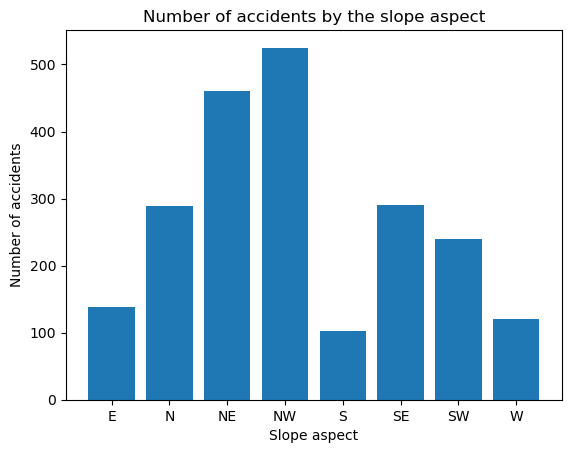

In [29]:
accidents_by_slope_aspect = avalanches[['start.zone.slope.aspect'] + ACCIDENT_TYPES].copy()
# Drop rows that the slope aspect is NaN
accidents_by_slope_aspect.dropna(subset=['start.zone.slope.aspect'], inplace=True)
# Reduce the number of directions of slopes to 8 aspects (instead of 16)
accidents_by_slope_aspect['start.zone.slope.aspect'] = [row[1:] if len(row) > 2 else row for row in accidents_by_slope_aspect['start.zone.slope.aspect']]
# Count accidents by the slope aspect
accidents_by_slope_aspect = accidents_by_slope_aspect.groupby(['start.zone.slope.aspect'], as_index=False).sum()
accidents_by_slope_aspect['number.combined'] = accidents_by_slope_aspect[ACCIDENT_TYPES].sum(axis=1)


plt.bar(accidents_by_slope_aspect['start.zone.slope.aspect'], accidents_by_slope_aspect['number.combined'])
plt.xlabel('Slope aspect')
plt.ylabel('Number of accidents')
plt.title('Number of accidents by the slope aspect')

C:\Users\mikol\AppData\Local\Temp\ipykernel_1700\1381274835.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


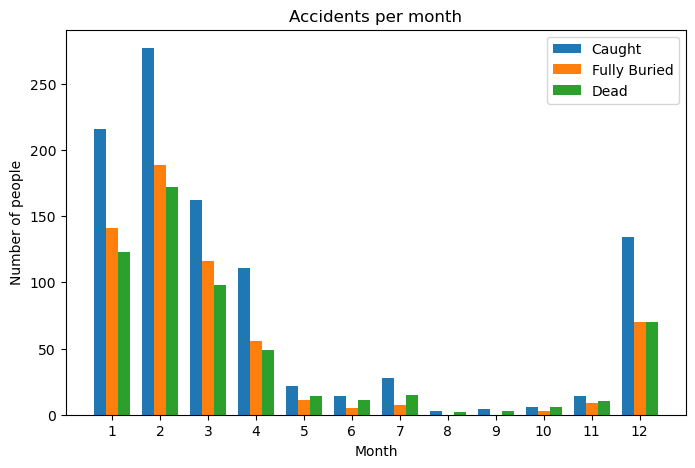

In [30]:
x = accidents_by_month['month']
X_axis = np.arange(len(accidents_by_month))

fig2, ax2 = plt.subplots(figsize=(8,5))

ax2.bar(X_axis - 0.25, accidents_by_month['number.caught'], 0.25, label='Caught')
ax2.bar(X_axis, accidents_by_month['number.fully.buried'], 0.25, label='Fully Buried')
ax2.bar(X_axis + 0.25, accidents_by_month['number.dead'], 0.25, label='Dead')
ax2.set_xticks(range(len(x)), x)
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of people')
ax2.set_title('Accidents per month')
ax2.legend(loc='upper right')

fig2.show()

In [31]:
#  Which slopes have the highest starting elevation point?
slopes_elevation = avalanches[['start.zone.slope.aspect', 'start.zone.elevation']].copy()
slopes_elevation.dropna(subset=['start.zone.slope.aspect'], inplace=True)  # drop NaN rows

#  Do this on the original dataframe instead?
slopes_elevation['start.zone.slope.aspect'] = [row[1:] if len(row) > 2 else row for row in slopes_elevation['start.zone.slope.aspect']]

mean_elevation = slopes_elevation.groupby('start.zone.slope.aspect', as_index=False).mean('start.zone.elevation')
# mean_elevation

plt.scatter(slopes_elevation['start.zone.slope.aspect'], slopes_elevation['start.zone.elevation'])
plt.scatter(slopes_elevation['start.zone.slope.aspect'], mean_elevation)
# plt.scatter(, accidents_by_slope_aspect['number.combined'])

SyntaxError: invalid syntax (1817171397.py, line 13)

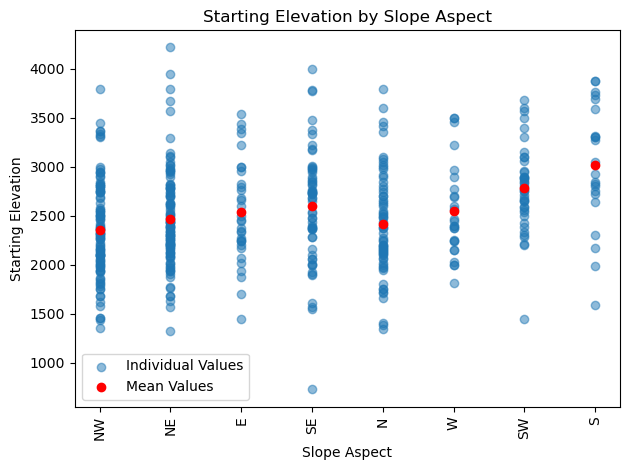

In [32]:
import matplotlib.pyplot as plt

# Copy relevant columns
slopes_elevation = avalanches[['start.zone.slope.aspect', 'start.zone.elevation']].copy()

# Drop rows with NaN in 'start.zone.slope.aspect'
slopes_elevation.dropna(subset=['start.zone.slope.aspect'], inplace=True)

# Adjust slope aspect values
slopes_elevation['start.zone.slope.aspect'] = [
    row[1:] if len(row) > 2 else row for row in slopes_elevation['start.zone.slope.aspect']
]

# Calculate mean elevation per slope aspect
mean_elevation = slopes_elevation.groupby('start.zone.slope.aspect', as_index=False).mean()

# Scatter plot for all individual values
plt.scatter(slopes_elevation['start.zone.slope.aspect'], slopes_elevation['start.zone.elevation'], alpha=0.5, label="Individual Values")

# Scatter plot for mean values
plt.scatter(mean_elevation['start.zone.slope.aspect'], mean_elevation['start.zone.elevation'], color='red', label="Mean Values")

# Customize plot
plt.xlabel("Slope Aspect")
plt.ylabel("Starting Elevation")
plt.title("Starting Elevation by Slope Aspect")
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


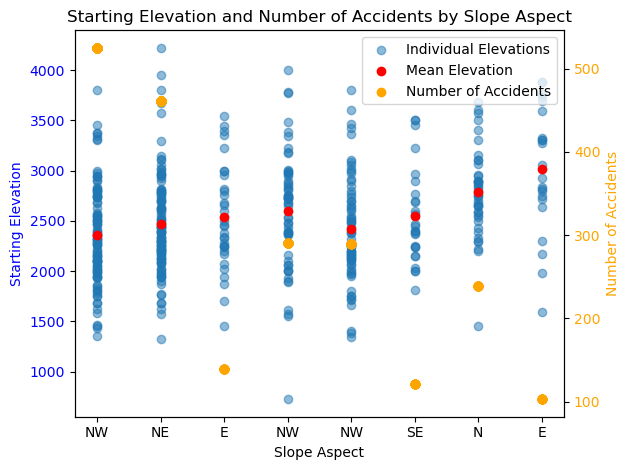

In [48]:
import matplotlib.pyplot as plt

# Merge the datasets to ensure matching slope aspects
merged_data = pd.merge(
    slopes_elevation,
    accidents_by_slope_aspect[['start.zone.slope.aspect', 'number.combined']],
    on='start.zone.slope.aspect',
    how='inner'
)

# Calculate mean elevation per slope aspect
mean_elevation = slopes_elevation.groupby('start.zone.slope.aspect', as_index=False).mean()

# Create the main plot
fig, ax1 = plt.subplots()

# Scatter plot for all individual elevations
ax1.scatter(
    merged_data['start.zone.slope.aspect'], 
    merged_data['start.zone.elevation'], 
    alpha=0.5, 
    label="Individual Elevations"
)

# Scatter plot for mean elevations
ax1.scatter(
    mean_elevation['start.zone.slope.aspect'], 
    mean_elevation['start.zone.elevation'], 
    color='red', 
    label="Mean Elevation"
)

# Customize primary y-axis
ax1.set_xlabel("Slope Aspect")
ax1.set_ylabel("Starting Elevation", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(merged_data['start.zone.slope.aspect'])))
ax1.set_xticklabels(merged_data['start.zone.slope.aspect'], rotation=0)

# Add secondary y-axis for accident counts
ax2 = ax1.twinx()
ax2.scatter(
    merged_data['start.zone.slope.aspect'], 
    merged_data['number.combined'], 
    color='#FFA500', 
    label="Number of Accidents"
)

# Customize secondary y-axis
ax2.set_ylabel("Number of Accidents", color='#FFA500')
ax2.tick_params(axis='y', labelcolor='#FFA500')

# Add legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Final adjustments and display
plt.title("Starting Elevation and Number of Accidents by Slope Aspect")
plt.tight_layout()
plt.show()


### 3. 

In [55]:
avalanches.head()

,avalanche.id,date,date.quality,hydrological.year,canton,local.name,start.zone.coordinates.x,start.zone.coordinates.y,coordinates.quality,start.zone.elevation,start.zone.slope.aspect,start.zone.inclination,forecasted.dangerlevel,number.dead,number.caught,number.fully.buried,activity,month
0,13007,1995-12-25,0,1995/96,VS,Chetseron / Vallon de l`Ertentse,602380,131230,25,2060,NW,NaN,NaN,2,2,0,offpiste,12
1,13014,1995-12-28,0,1995/96,VS,Verbier / Les Ruinettes,586070,104160,25,2340,NNE,39.0,NaN,1,1,1,offpiste,12
2,13028,1996-01-14,0,1995/96,GR,Chilchalphorn,731720,155110,25,2960,E,35.0,NaN,1,4,2,tour,1
3,13038,1996-02-14,0,1995/96,VD,La Lécherette,575300,141010,25,1580,NNW,42.0,NaN,1,2,1,offpiste,2
4,13040,1996-02-15,0,1995/96,OW,Pilatus / Matthorn / Ruessiflue,661640,202180,25,1860,NW,40.0,NaN,1,4,3,tour,2


##  Step 5. Extend with machine learning predictions:

### Finding the most impactful terrain features for avalanche accidents in Swiss Alps 

What are the critical aspects for an accident in the mountain?
Develop a machine learning algorithm to detect features that matter most.
Take two approaches with regression and clusterization, both of which use 2 different methods of obtaining a result. (For clusterization: Decision tree, naive bayes, For regression: ?)

## Step 6: Final conclusion and potential pitfalls: